## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler

import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set
import target_parser

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from target_parser.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

Proportion of failures in Undersampled dataset to max size 300 000:

Status			 Percentage	 Amount
Other:			 56.269%	 300000
Status_9_Substatus_8: 	 42.890 %	 228668
Status_62_Substatus_7:	 0.769%		 4098
Status_62_Substatus_30:	 0.072%		 383



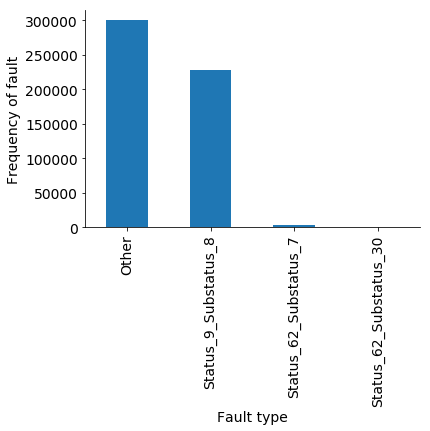

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.get_statues_percentage(undersampled_data, 'Undersampled dataset to max size 300 000:\n')
data_sampling.plot_balance(undersampled_data, 'Status')

## Do more undersampling

In [4]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Status_9_Substatus_8")

Proportion of failures in Undersampled dataset to max size 50 000:

Status			 Percentage	 Amount
Other:			 47.856%	 50000
Status_9_Substatus_8: 	 47.856 %	 50000
Status_62_Substatus_7:	 3.922%		 4098
Status_62_Substatus_30:	 0.367%		 383



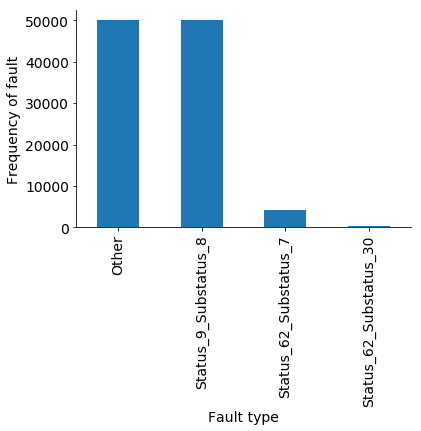

<Figure size 1440x1152 with 0 Axes>

In [5]:
data_sampling.get_statues_percentage(undersampled_data, 'Undersampled dataset to max size 50 000:\n')
data_sampling.plot_balance(undersampled_data, 'Status')

In [47]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data[['Status']]
X.shape

(104481, 34)

In [48]:
y

,Status
0,Other
1,Status_9_Substatus_8
2,Status_9_Substatus_8
3,Status_9_Substatus_8
4,Other
5,Status_9_Substatus_8
6,Status_9_Substatus_8
7,Other
8,Status_9_Substatus_8
9,Other


### Translate status codes to int for easier comparison

In [49]:
target_parser.status_to_code(y)
y

target_parser.ipynb:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "\n",


,Status
0,0
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,0


### Split into training and test

In [50]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [51]:
y_train.Status.value_counts()

1    33500
0    33500
2     2746
3      256
Name: Status, dtype: int64

## Random forest and feature importance

random_forest_method.ipynb:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  },


Normalized confusion matrix
[[9.92969697e-01 4.66666667e-03 2.30303030e-03 6.06060606e-05]
 [2.84848485e-03 9.97151515e-01 0.00000000e+00 0.00000000e+00]
 [4.43786982e-03 0.00000000e+00 9.95562130e-01 0.00000000e+00]
 [2.83464567e-01 1.57480315e-02 0.00000000e+00 7.00787402e-01]]


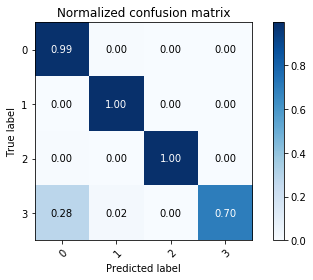

Total Accuracy 		0.994

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.995 		 0.993 		 0.994
1                         	 0.995 		 0.997 		 0.996
2                         	 0.973 		 0.996 		 0.984
3                         	 0.989 		 0.701 		 0.820


In [22]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [23]:
rf

,importance
ActivePower,0.167012
Log-T-Raw-Rectifier1HeatSink,0.081044
Log-T-Raw-TransformerTemperature,0.079107
Average blade angle across A B C,0.047586
Log-T-Raw-Stator2Temperature,0.046843
Log-T-Raw-Rotor1Temperature,0.041287
Log-T-Raw-Stator1Temperature,0.040481
Log-T-Raw-Rotor2Temperature,0.037895
Log-T-Raw-Rectifier2HeatSink,0.037051
Log-T-Raw-NacelleAmbientTemperature,0.033516


# Preprocessing

### Scale dataset

### Feature Extraction (based on lowest feature importance from RF)

In [52]:
print('X_train', X_train.shape)
print('X_test ', X_test.shape)

dropColumns = ['Log-T-Raw-BladeATemperature', 'Log-T-Raw-BladeBTemperature', 'Log-T-Raw-BladeCTemperature',
               'Log-T-Raw-BladeAPitchControlBox', 'Log-T-Raw-BladeBPitchControlBox', 'Log-T-Raw-BladeCPitchControlBox',
               'Log-T-Raw-BladeAPitchHeatSink', 'Log-T-Raw-BladeBPitchHeatSink', 'Log-T-Raw-BladeCPitchHeatSink',
               'Log-T-Raw-RectifierCabinetTemperature', 'Log-T-Raw-NacelleControlCabinetTemperature',
               'WindVane', 'WindDirection', 'WindSpeed','Nacelle-Temperature', 'Spinner-Temperature']

X_train = X_train.drop(columns=dropColumns)
X_test = X_test.drop(columns=dropColumns)

print('X_train', X_train.shape)
print('X_test ', X_test.shape)

X_train (70002, 34)
X_test  (34479, 34)
X_train (70002, 18)
X_test  (34479, 18)


In [53]:
print(X_train.shape)

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)

(70002, 18)
(70002, 18)


In [45]:
print('X_train2', X_train2.shape)
print('X_test2 ', X_test2.shape)

X_train2 (70002, 18)
X_test2  (34479, 18)


In [ ]:
X_train = pd.DataFrame(X_train_scaled, columns=list(X))
X_train.head(10)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X))
X_test_scaled.head(10)

In [70]:
X

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,-0.200000,7.200000,13.099999,217.0,305.0,23.0,35.0,31.0,21.0,22.0,...,51.0,48.0,31.0,42.0,7.0,17.0,20.0,38.0,1.000000,216.800003
1,-6.700000,7.000000,13.570000,268.0,352.0,20.0,28.0,30.0,19.0,21.0,...,52.0,52.0,32.0,45.0,9.0,17.0,20.0,36.0,1.000000,261.299988
2,-8.900001,13.700000,3.340000,161.0,0.0,4.0,13.0,10.0,8.0,8.0,...,2.0,2.0,14.0,17.0,-5.0,2.0,23.0,19.0,60.110001,152.100006
3,5.100000,4.000000,11.880000,51.0,0.0,15.0,26.0,24.0,23.0,22.0,...,75.0,72.0,37.0,44.0,14.0,20.0,25.0,36.0,5.460000,56.099998
4,3.100000,3.300000,8.490000,218.0,61.0,17.0,26.0,22.0,17.0,16.0,...,51.0,51.0,27.0,30.0,6.0,8.0,14.0,28.0,1.000000,221.100006
5,6.300000,6.500000,14.020000,133.0,410.0,10.0,26.0,25.0,11.0,12.0,...,51.0,35.0,22.0,38.0,-2.0,7.0,13.0,29.0,1.000000,139.300003
6,1.700000,12.800000,20.219999,266.0,2071.0,15.0,34.0,25.0,16.0,17.0,...,46.0,54.0,22.0,30.0,6.0,14.0,16.0,34.0,1.000000,267.700012
7,3.500000,4.200000,10.090000,242.0,130.0,21.0,32.0,29.0,19.0,20.0,...,47.0,45.0,28.0,39.0,8.0,18.0,23.0,49.0,1.000000,245.500000
8,-4.700000,8.000000,15.660000,201.0,628.0,25.0,37.0,34.0,22.0,23.0,...,51.0,41.0,34.0,49.0,14.0,23.0,28.0,53.0,1.000000,196.300003
9,16.000000,3.500000,0.000000,112.0,0.0,6.0,8.0,7.0,10.0,10.0,...,13.0,10.0,21.0,15.0,8.0,10.0,16.0,29.0,91.059998,128.000000


In [69]:
correct_columns = list(filter(lambda x: (x not in dropColumns), list(X)))

X_train = pd.DataFrame(X_train_scaled, columns=correct_columns)
X_train.head(10)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=correct_columns)
X_test_scaled.head(10)

,RotorSpeed,NacelleDirection,ActivePower,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-Rotor1Temperature,Log-T-Raw-Rotor2Temperature,Log-T-Raw-Stator2Temperature,Log-T-Raw-Stator1Temperature,Log-T-Raw-NacelleAmbientTemperature,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C
0,0.384714,0.612813,0.030379,0.451613,0.422078,0.274882,0.284360,0.541899,0.544944,0.843137,0.645161,0.697674,0.489362,0.923077,0.761905,0.763636,0.436893,0.000000
1,0.520824,0.415042,0.099043,0.322581,0.337662,0.208531,0.213270,0.491620,0.494382,0.450980,0.623656,0.686047,0.500000,0.423077,0.476190,0.272727,0.368932,0.000000
2,0.869043,0.348189,0.540574,0.490323,0.376623,0.270142,0.279621,0.703911,0.719101,0.588235,0.709677,0.767442,0.478723,0.596154,0.750000,0.690909,0.621359,0.181309
3,0.501073,0.682451,0.000000,0.335484,0.298701,0.236967,0.236967,0.553073,0.556180,0.372549,0.860215,0.941860,0.478723,0.384615,0.452381,0.290909,0.378641,0.082139
4,0.223272,0.097493,0.000000,0.238710,0.240260,0.080569,0.075829,0.290503,0.286517,0.254902,0.172043,0.174419,0.170213,0.230769,0.011905,0.072727,0.223301,0.000000
5,0.337484,0.086351,0.015397,0.303226,0.285714,0.127962,0.123223,0.368715,0.365169,0.196078,0.473118,0.500000,0.234043,0.211538,0.119048,0.145455,0.252427,0.000000
6,0.517389,0.395543,0.000000,0.387097,0.357143,0.241706,0.255924,0.558659,0.556180,0.588235,0.860215,0.930233,0.478723,0.615385,0.547619,0.400000,0.359223,0.083540
7,0.779734,0.376045,0.354557,0.303226,0.292208,0.184834,0.184834,0.474860,0.471910,0.156863,0.645161,0.639535,0.500000,0.153846,0.309524,0.072727,0.184466,0.000000
8,0.522542,0.763231,0.000000,0.367742,0.331169,0.232227,0.241706,0.569832,0.573034,0.431373,0.806452,0.790698,0.531915,0.403846,0.464286,0.272727,0.281553,0.162876
9,0.508373,0.247911,0.000000,0.316129,0.253247,0.118483,0.118483,0.418994,0.421348,0.137255,0.870968,0.918605,0.393617,0.115385,0.297619,0.163636,0.116505,0.276382


### SVM method

Loading...
Training...


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[9.60060606e-01 3.96969697e-02 2.42424242e-04 0.00000000e+00]
 [3.75818182e-01 6.24181818e-01 0.00000000e+00 0.00000000e+00]
 [8.27662722e-01 5.76923077e-02 1.14644970e-01 0.00000000e+00]
 [9.44881890e-01 5.51181102e-02 0.00000000e+00 0.00000000e+00]]


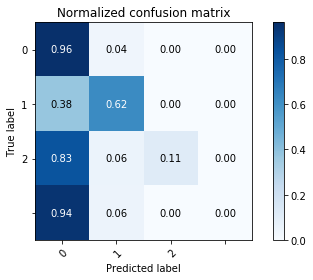

Plotting Performance Measure...
Total Accuracy 		0.763

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.680 		 0.960 		 0.796
1                         	 0.933 		 0.624 		 0.748
2                         	 0.975 		 0.115 		 0.205


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_